In [1]:
!pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 9.1 MB/s eta 0:00:00


In [2]:
!pip install pytorch-forecasting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [3]:
!pip install pytorch-forecasting[mqf2]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cpflows: filename=cpflows-0.1.2-py3-none-any.whl size=54299 sha256=2d96a56d93c9b513d5a327e8002414d87ef4a6ba0d5647f8a9183133dff9e3fb
  Stored in directory: /root/.cache/pip/wheels/1b/c3/fd/cdcca84615eb336ec3d17d9d1fd858684240e91b47cf3dab6e
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6487 sha256=c2516112ec80026ff2512a8f5f3cb0db862c30af29275548b4640dd88ce7db4d
  Stored in directory: /root/.cache/pip/wheels/64/19/61/d440ccd46a2a014bce61fc5c6c8495dedd32ef04cba8b34b28
Successfully built cpflows subprocess32


In [4]:
# Подключаюсь к своему гугл диску, чтобы взять оттуда данные.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive

'Colab Notebooks'		    warp-drive-master.zip
'Google Планета Земля'		   'ЛЦТ 2023_шаблон презнтации (1).gslides'
'terminal_data_hackathon v4.xlsx'  'Новый документ.gdoc'
'times v4.csv'			   'Презентация без названия.gslides'
 warp-drive-master


# Нами была выбрана модель $N-BEATS:$ https://arxiv.org/abs/1905.10437, посколько она является интерпретируемой и довольно точно предсказывает наш $Time series$.

In [6]:
import numpy as np
import pandas as pd
import copy
from pathlib import Path
import torch
import torch.nn as nn

import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping

import pytorch_forecasting
from pytorch_forecasting import Baseline, TimeSeriesDataSet, DeepAR, NHiTS, NBeats
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting.metrics import SMAPE, QuantileLoss, MultivariateNormalDistributionLoss, MQF2DistributionLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [8]:
# Получение данных, логарифмирование для снижения дисперсии.

PATH_INCOMES = '/content/drive/MyDrive/terminal_data_hackathon v4.xlsx'
df = pd.read_excel(PATH_INCOMES, sheet_name='Incomes')
df.index = df['TID']
df.drop(columns='TID', inplace=True)
df = df.transpose()
tid_indexes = df.columns.values
#df["time_idx"] = df['Time'].dt.hour*60 + df['Time'].dt.minute
#df.insert(0, 'Time', df.index)
#df.index = [i for i in range(len(df))]
df = np.log(df + 1)
df

TID,406136,406139,406145,406148,406180,406190,406196,406504,406509,406536,...,699451,699540,699560,699572,699577,699578,699579,699629,699641,699664
остаток на 31.08.2022 (входящий),11.982935,12.866183,12.567241,12.779876,13.299674,11.849405,12.669810,13.615841,13.701223,13.386266,...,11.856522,11.982935,0.000000,13.384729,12.834684,10.757924,12.371591,11.112463,12.535380,12.715901
2022-09-01 00:00:00,11.407576,11.542494,11.870607,10.819798,11.472114,12.296832,11.652696,12.853179,11.759793,11.050906,...,10.757924,11.289794,11.608245,11.728045,0.000000,0.000000,10.799596,11.050906,11.050906,0.000000
2022-09-02 00:00:00,11.561725,12.235636,11.820418,11.198228,11.314487,12.371591,11.719948,12.666660,11.744045,11.082158,...,11.018646,11.532738,10.950824,0.000000,10.126671,0.000000,11.127278,11.050906,0.000000,0.000000
2022-09-03 00:00:00,11.502885,12.031725,11.728045,10.878066,11.170449,12.292255,11.703554,13.079458,12.043560,0.000000,...,11.127278,11.849405,11.951187,11.931642,0.000000,9.210440,0.000000,11.050906,0.000000,10.757924
2022-09-04 00:00:00,11.580593,11.728045,11.669938,11.082158,11.184435,12.264346,11.695255,12.715901,11.635152,0.000000,...,11.238502,11.264477,12.165256,11.989166,0.000000,0.000000,0.000000,11.066654,10.839601,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-26 00:00:00,12.149508,12.111767,11.678448,11.127278,11.156265,12.323860,11.820418,12.901719,11.863589,10.491302,...,11.097425,12.567241,0.000000,8.006701,0.000000,9.210440,0.000000,10.915107,0.000000,0.000000
2022-11-27 00:00:00,11.571204,11.719948,11.643962,11.034906,11.251574,12.128117,11.418626,12.715901,11.813037,10.434145,...,11.198228,10.596660,12.160034,12.310437,0.000000,0.000000,0.000000,10.896758,10.571343,10.691968
2022-11-28 00:00:00,11.451061,11.835016,11.759793,0.000000,11.373675,12.061053,12.165256,12.546114,11.744045,10.341775,...,10.373522,11.599112,11.542494,10.596660,10.126671,10.714440,11.552156,10.757924,0.000000,0.000000
2022-11-29 00:00:00,11.225257,11.626263,11.703554,11.678448,10.985310,12.072547,11.418626,12.762830,12.117247,10.373522,...,10.645449,12.170451,11.608245,10.985310,10.596660,10.668979,11.050906,11.034906,11.350418,10.915107


In [9]:
# Делаем из всей таблицы вектор чтобы было удобнее работать

conc = pd.concat([df.iloc[:, i] for i in range(df.shape[1])])

остаток на 31.08.2022 (входящий)    11.982935
2022-09-01 00:00:00                 11.407576
2022-09-02 00:00:00                 11.561725
2022-09-03 00:00:00                 11.502885
2022-09-04 00:00:00                 11.580593
                                      ...    
2022-11-26 00:00:00                  0.000000
2022-11-27 00:00:00                 10.691968
2022-11-28 00:00:00                  0.000000
2022-11-29 00:00:00                 10.915107
2022-11-30 00:00:00                  0.000000
Length: 149960, dtype: float64

In [10]:
# Делаем таблицу с которой будем работать.
# Где value - наш прирост денег, group - номер терминала, time_idx - шаг времени.

data = pd.DataFrame(
    dict(
        value = conc,
        group=np.repeat(np.arange(df.shape[1]), df.shape[0]),
        time_idx=np.tile(np.arange(df.shape[0]), df.shape[1]),
        Time = conc.index
    )
)

for i in range(1630):
    data['Time'][92*i] = '2022-08-31 00:00:00'
    
data['Time'] = pd.to_datetime(data['Time'])
#data["time_idx"] = np.repeat(np.arange(92), 1630)
data.index = [i for i in range(len(conc))]
data = data.astype(dict(group=str))
data.time_idx = data.time_idx.astype('int64')
data.value = data.value.astype('float64')

In [11]:
# Тут наглядно видно, что для каждого терминала мы берем приросты за все 92 дня.

data

,value,group,time_idx,Time
0,11.982935,0,0,2022-08-31
1,11.407576,0,1,2022-09-01
2,11.561725,0,2,2022-09-02
3,11.502885,0,3,2022-09-03
4,11.580593,0,4,2022-09-04
...,...,...,...,...
149955,0.000000,1629,87,2022-11-26
149956,10.691968,1629,88,2022-11-27
149957,0.000000,1629,89,2022-11-28
149958,10.915107,1629,90,2022-11-29


In [12]:

from pytorch_forecasting.data import GroupNormalizer
# длина окна, на основе которого будет делаться прогноз
max_encoder_length = 30
# длина предсказания
max_prediction_length = 30

# отсечка тренировочных данных
training_cutoff = data["time_idx"].max() - max_prediction_length

context_length = max_encoder_length
prediction_length = max_prediction_length

# Создаем pytorch dataset
training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="value",
    categorical_encoders={"group": NaNLabelEncoder().fit(data.group)},
    group_ids=["group"],
    time_varying_unknown_reals=["value"],
    max_encoder_length=context_length,
    max_prediction_length=prediction_length,
    
)

In [13]:
# создаем валидационный датасет (начиная с треноровочной отсечки)
validation = TimeSeriesDataSet.from_dataset(training, data, min_prediction_idx=training_cutoff + 1, )
batch_size = 64

# создаем два даталоадера
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

In [14]:
# actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
# baseline_predictions = Baseline().predict(val_dataloader)
# SMAPE()(baseline_predictions, actuals)

In [15]:
# Объявляем модель, для того чтобы подобрать гиперпараметры, в данном случае - learning rate

pl.seed_everything(42)
trainer = pl.Trainer(accelerator="auto", gradient_clip_val=0.01)
net = NBeats.from_dataset(training, learning_rate=3e-2, weight_decay=1e-2, widths=[32, 512], backcast_loss_ratio=0.1)

INFO: Global seed set to 42
INFO:lightning.fabric.utilities.seed:Global seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.0015848931924611134
INFO:lightning.pytorch.tuner.lr_finder:Learning rate set to 0.0015848931924611134
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_9fff295e-b969-4fcc-999a-1ecfeab89087.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_9fff295e-b969-4fcc-999a-1ecfeab89087.ckpt


suggested learning rate: 0.0015848931924611134


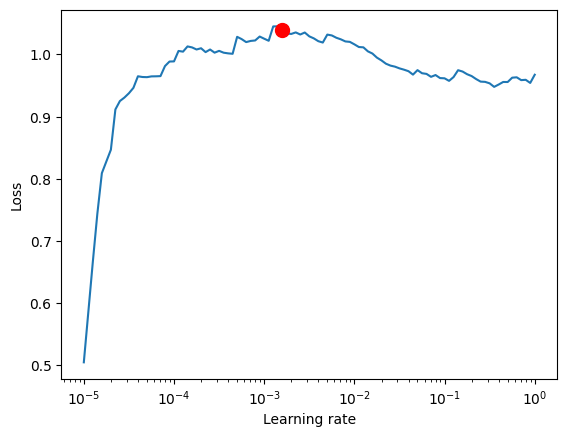

In [16]:
# находим оптимальный learning rate
from lightning.pytorch.tuner import Tuner

res = Tuner(trainer).lr_find(net, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader, min_lr=1e-5)
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()
net.hparams.learning_rate = res.suggestion()

In [17]:
# создаем коллбек - если лосс начнет расти, то обучение закончится.
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")

trainer = pl.Trainer(
    max_epochs=10,
    accelerator="auto",
    enable_model_summary=True,
    gradient_clip_val=0.01,
    callbacks=[early_stop_callback],
    limit_train_batches=150,
)

# объявляем NBeats модель
net = NBeats.from_dataset(
    training,
    learning_rate=res.suggestion(),
    log_interval=10,
    log_val_interval=1,
    weight_decay=1e-2,
    widths=[32, 512],
    backcast_loss_ratio=1.0,
)

# Обучаем
trainer.fit(
    net,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name            | Type       | Params
-----------------------------------------------
0 | loss            | MASE       | 0     
1 | logging_metrics | ModuleList | 0     
2 | net_blocks      | ModuleList | 1.7 M 
-----------------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.717     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name            | Type       | Params
-----------------------------------------------
0 | loss            | MASE       | 0     
1 | logging_metrics | ModuleList | 0     
2 | net_blocks      | ModuleList | 1.7 M 
----------------

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [18]:
# загружаем модель с лучшими параметрами

best_model_path = trainer.checkpoint_callback.best_model_path
best_model = NBeats.load_from_checkpoint(best_model_path)

## Метрика $MASE = \frac{\frac{1}{j}∑_j|e_j|}{\frac{1}{T - 1}∑^T_{t=2}|Y_t - Y_{t-1}|}$


In [29]:
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_model.predict(val_dataloader)
(actuals - predictions).abs().mean()

tensor(0.8715)

In [20]:
# смотрим на предсказания модели

raw_predictions, x = best_model.predict(val_dataloader, mode="raw", return_x=True)[:2]

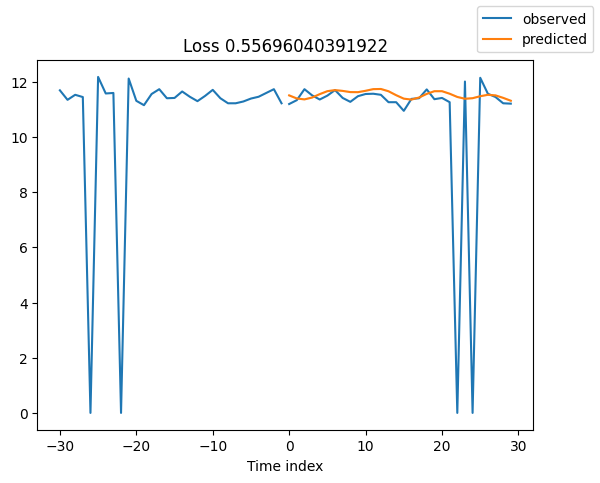

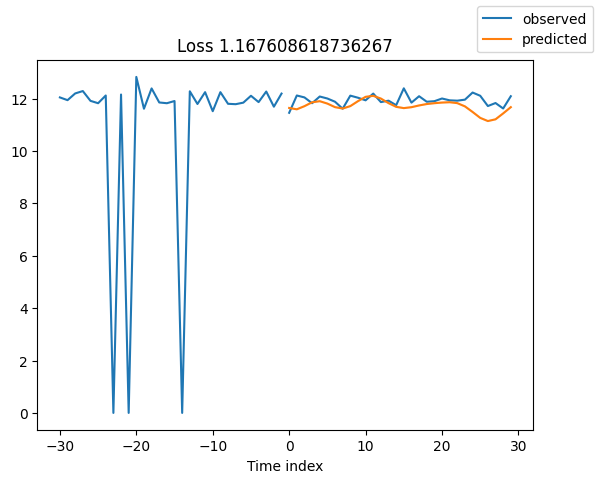

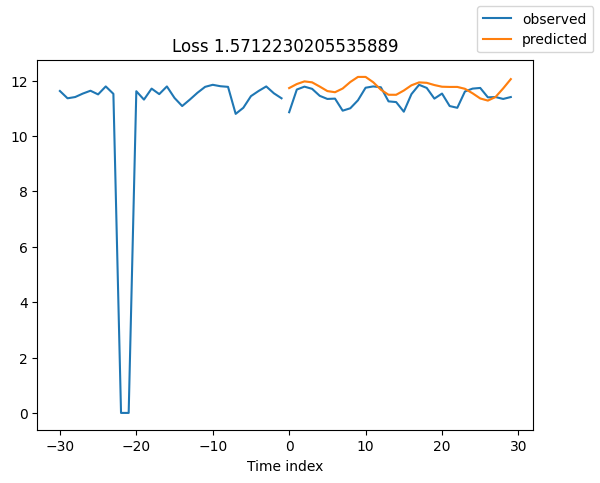

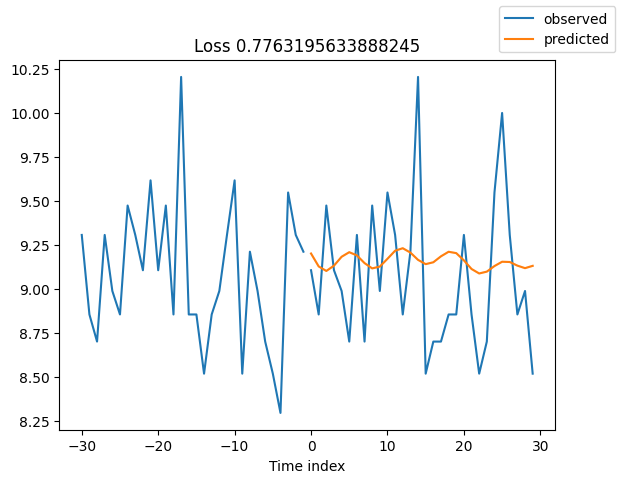

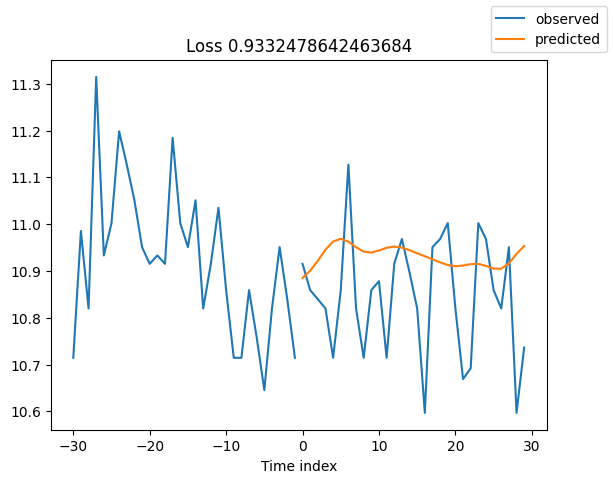

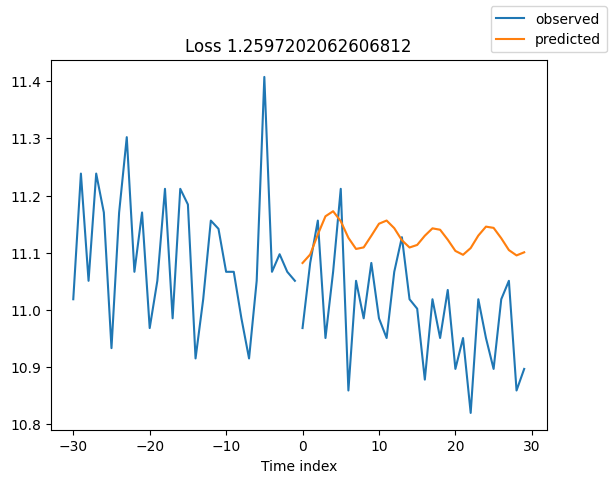

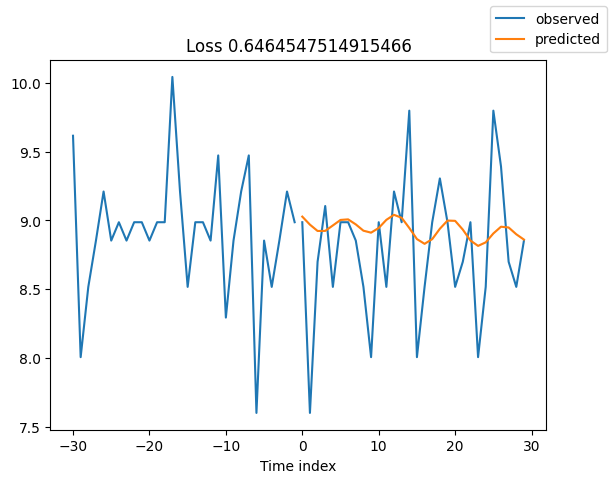

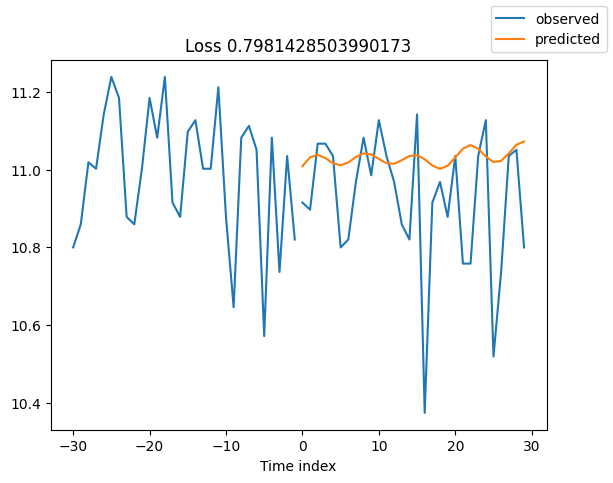

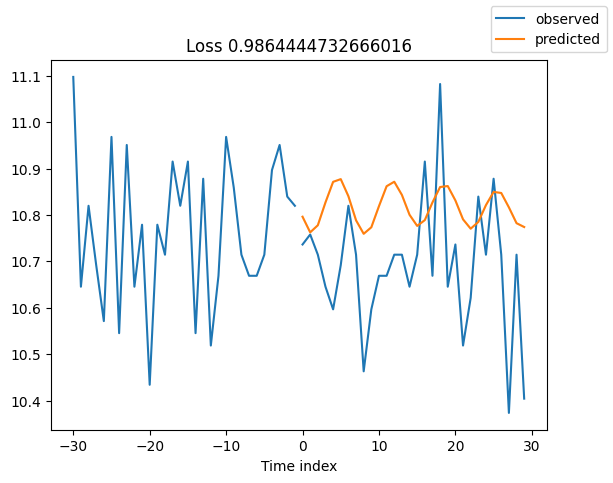

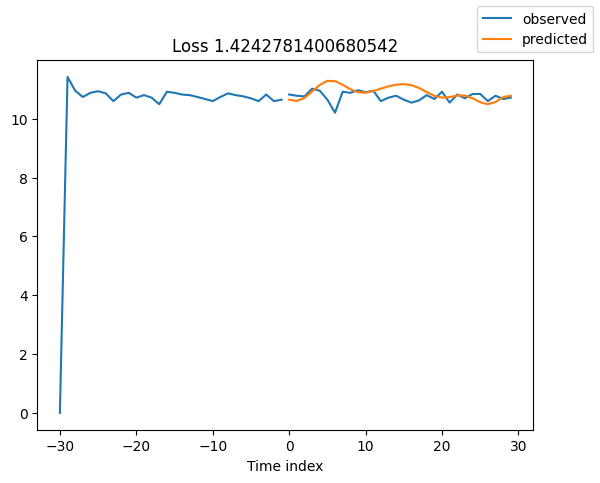

In [27]:
for idx in range(10):  # строим 10 графиков предсказания
    best_model.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True)

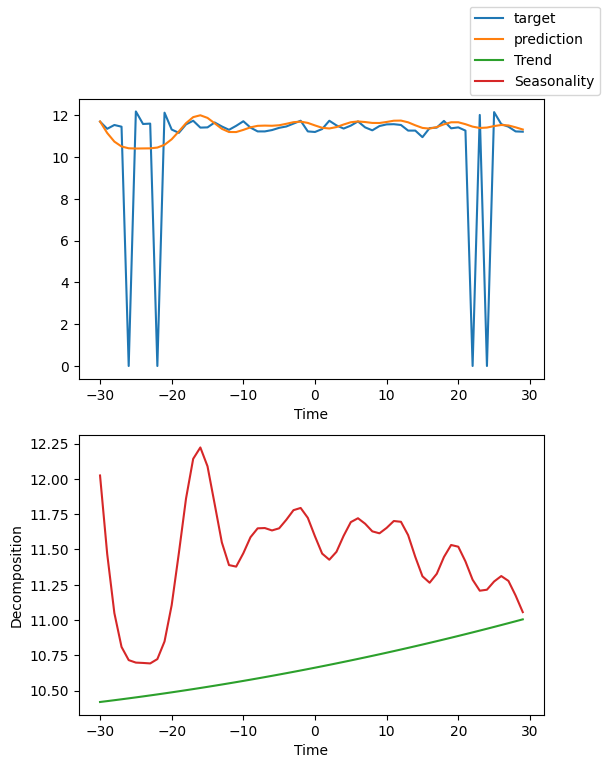

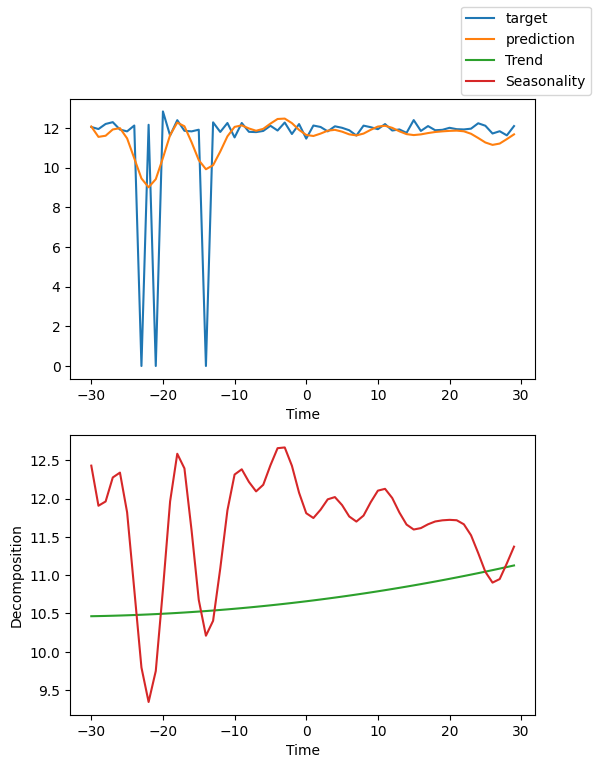

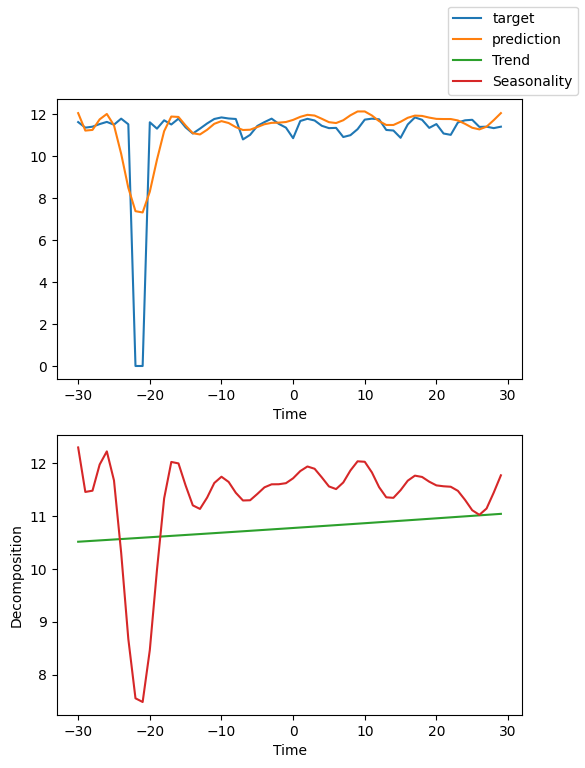

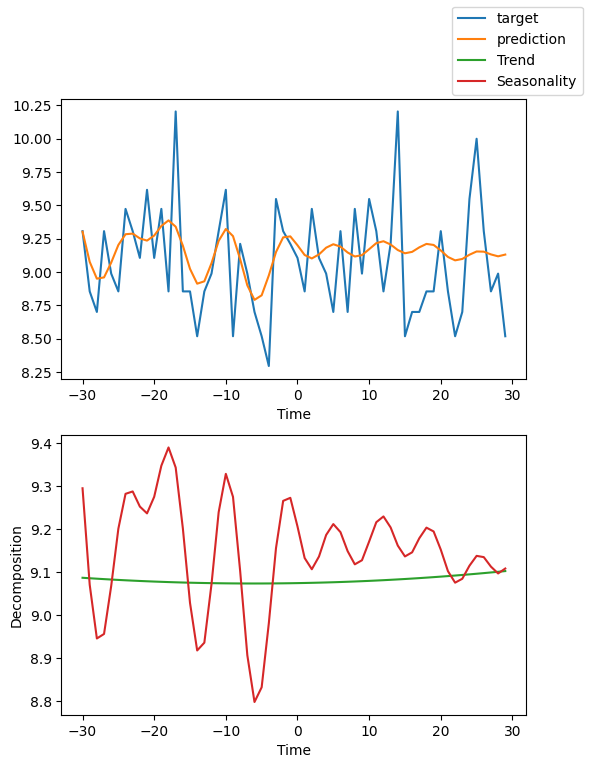

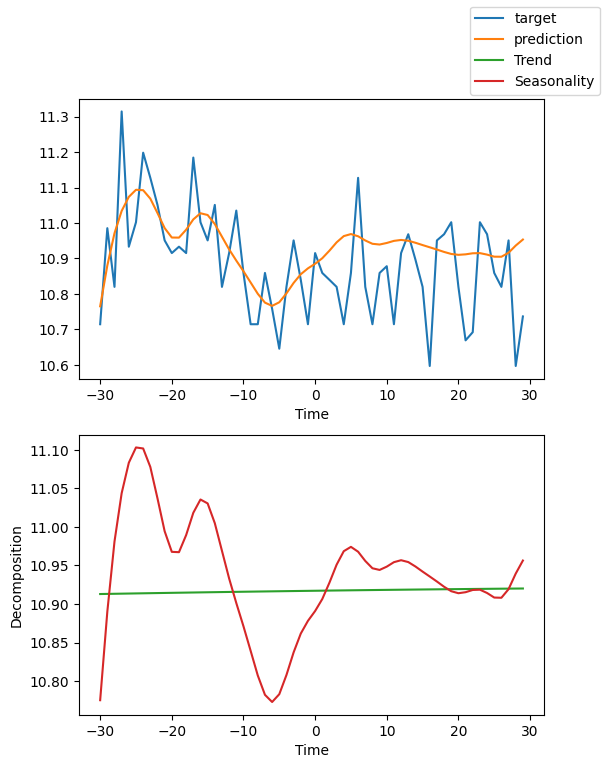

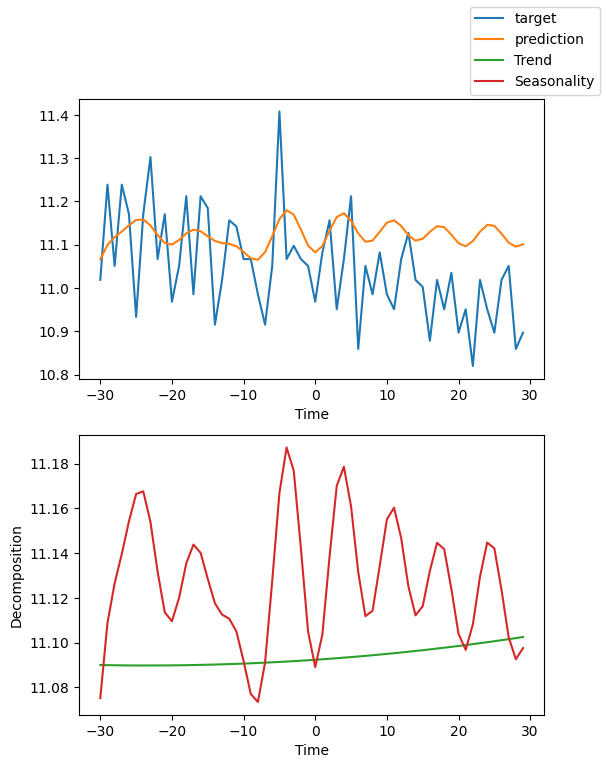

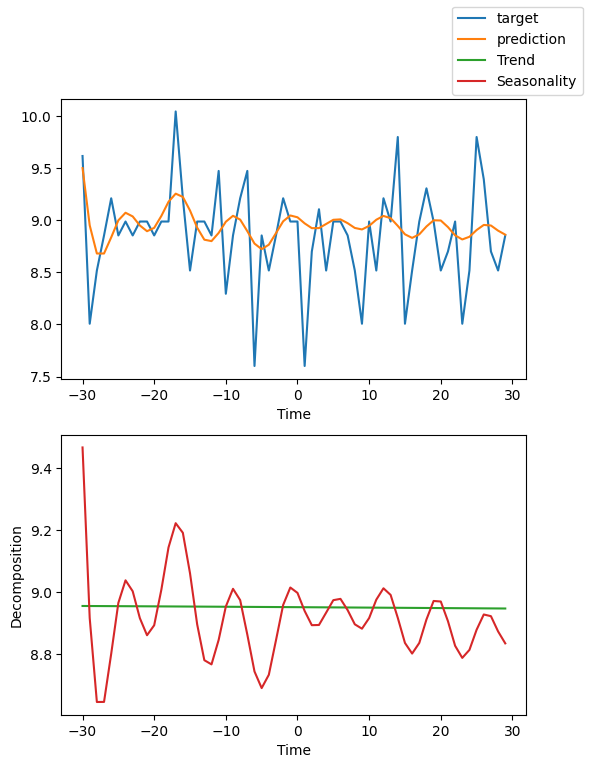

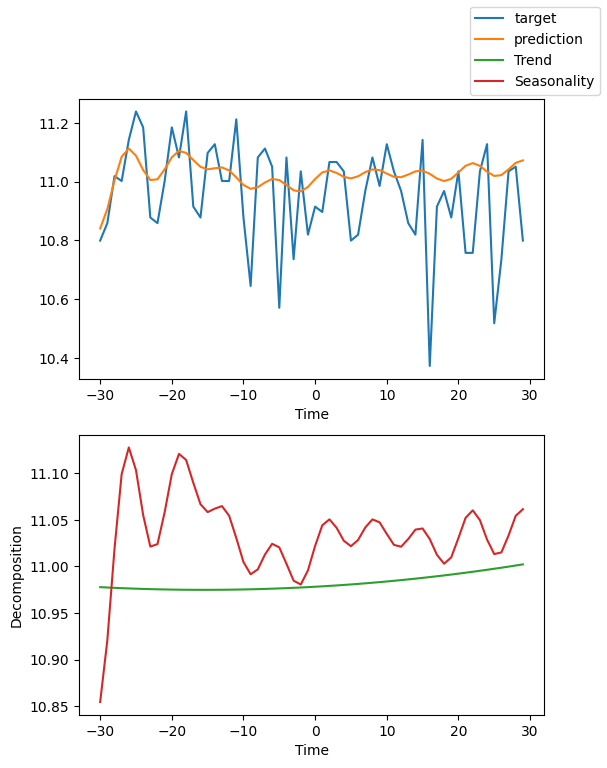

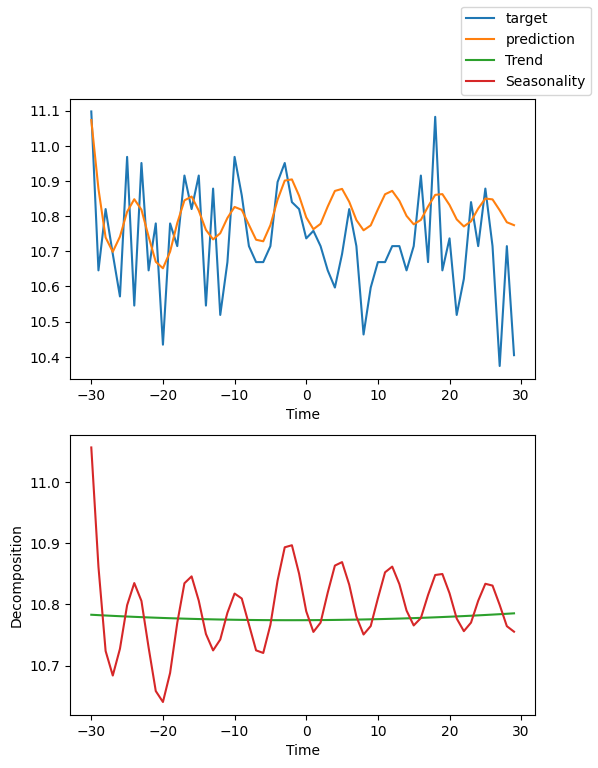

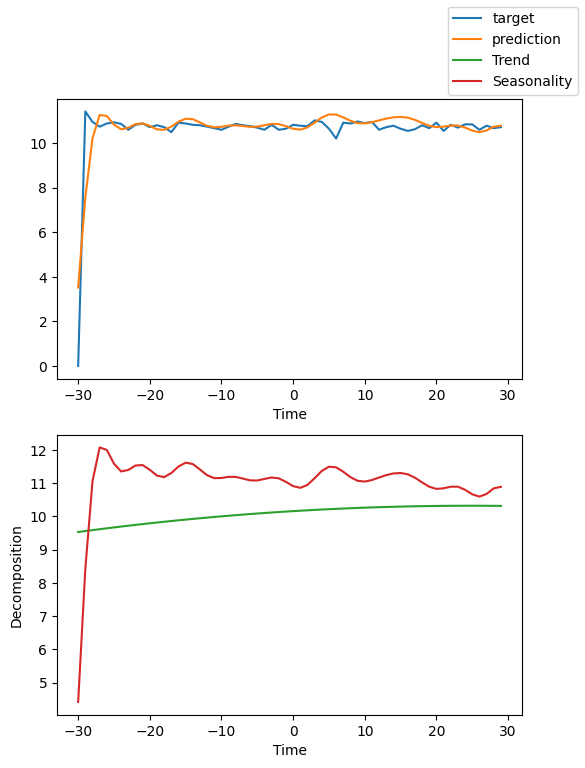

In [28]:
for idx in range(10):  # тут рисуются графики, которые интерпритируют модель - тренд, сезонность
    best_model.plot_interpretation(x, raw_predictions, idx=idx)

In [35]:
# берем предсказания, далее импортим их в ексель и отдаем нашему основному алгоритму

prd = best_model.predict(val_dataloader)

In [36]:
rs = pd.DataFrame(prd.cpu())
rs = rs.transpose()
rs.columns = df.columns

# последние 30 дней, данные логарфмированы! экспоненциировать их будем в основном алгоритме.
n = len(df) - 30
rs.index = df.index[n:]

In [37]:
rs.to_excel(r'B:\PYTHON PROJECTS\PythonProjects\Hackathon\Задача 6\fc data\forecast last 30 days data.xlsx')